In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
import xgboost as xgb
from sklearn.metrics import classification_report, confusion_matrix,  accuracy_score

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

In [52]:
df = pd.read_csv("/content/Churn_Modelling.csv")

EDA

In [53]:
df.head(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,France,Male,50,7,0.00,2,1,1,10062.80,0
7,8,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
8,9,15792365,He,501,France,Male,44,4,142051.07,2,0,1,74940.50,0
9,10,15592389,H?,684,France,Male,27,2,134603.88,1,1,1,71725.73,0


In [54]:
df.shape

(10000, 14)

In [55]:
df.isnull().sum()

,0
RowNumber,0
CustomerId,0
Surname,0
CreditScore,0
Geography,0
Gender,0
Age,0
Tenure,0
Balance,0
NumOfProducts,0


In [56]:
df.duplicated().sum()

0

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


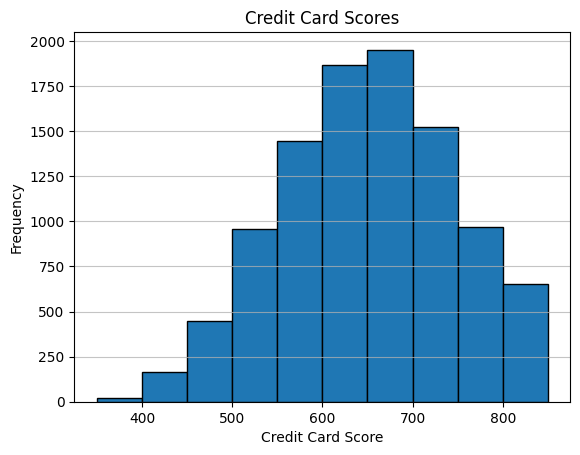

In [58]:
credit_scores = df['CreditScore']

plt.hist(credit_scores, bins=10,edgecolor='black')
plt.title('Credit Card Scores')
plt.xlabel('Credit Card Score')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.show()

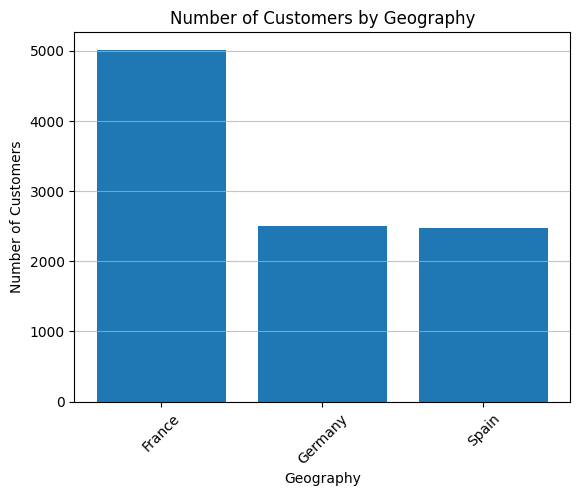

In [59]:
geography_counts = df['Geography'].value_counts()

# Plotting the bar chart
plt.bar(geography_counts.index, geography_counts.values)
plt.title('Number of Customers by Geography')
plt.xlabel('Geography')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.75)
plt.show()

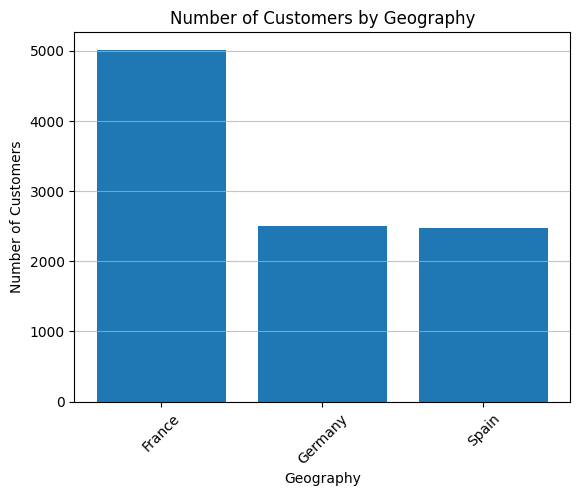

In [60]:
geography_counts = df['Geography'].value_counts()

# Plotting the bar chart
plt.bar(geography_counts.index, geography_counts.values)
plt.title('Number of Customers by Geography')
plt.xlabel('Geography')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.75)
plt.show()

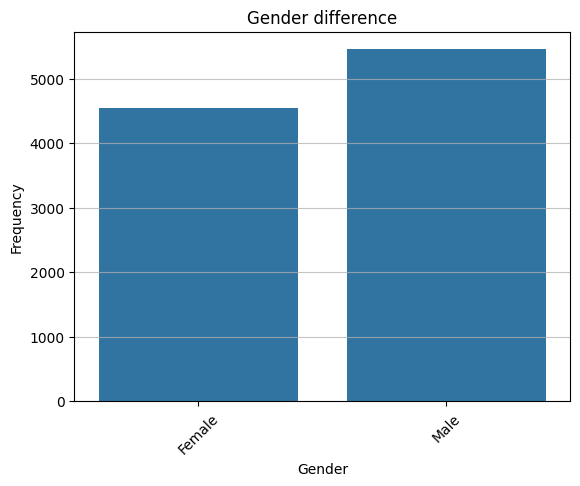

In [61]:
gender_count = df['Gender']

sns.countplot(x='Gender', data=df)
plt.title("Gender difference")
plt.xlabel("Gender")
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.75)
plt.show()

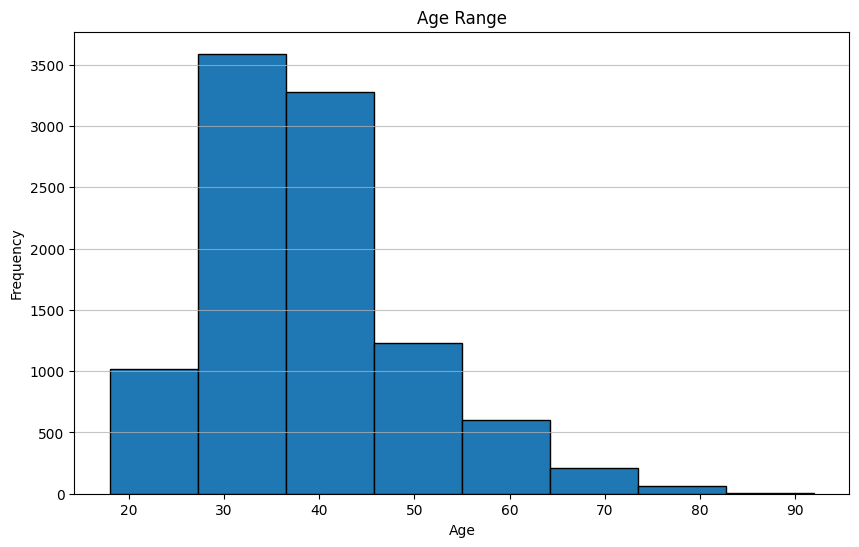

In [62]:
Age_range = df['Age']
plt.figure(figsize=(10, 6))
plt.hist(Age_range, bins=8,edgecolor='black')
plt.title('Age Range')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.show()

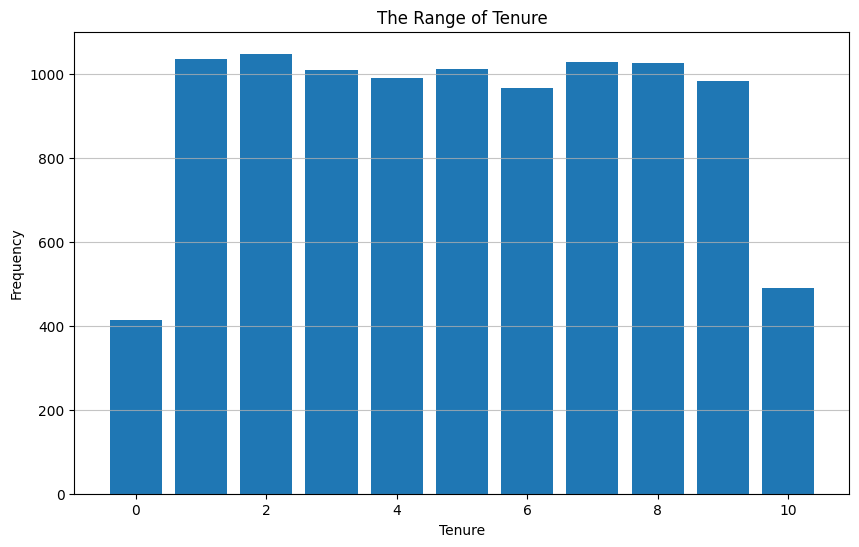

In [63]:
Tenure_range = df['Tenure'].value_counts()

# Plotting the bar chart
plt.figure(figsize=(10, 6))
plt.bar(Tenure_range.index, Tenure_range.values)
plt.title('The Range of Tenure')
plt.xlabel('Tenure')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.show()

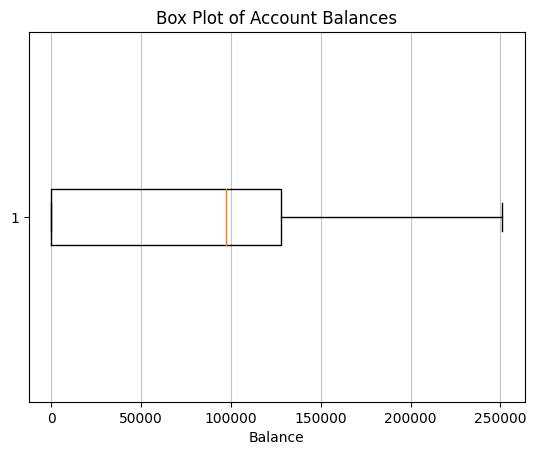

In [64]:
plt.boxplot(df['Balance'], vert=False)
plt.title('Box Plot of Account Balances')
plt.xlabel('Balance')
plt.grid(axis='x', alpha=0.75)
plt.show()

In [65]:
df['Z_Score'] = (df['Balance'] - df['Balance'].mean()) / df['Balance'].std()

# Identify outliers
anomalies = df[np.abs(df['Z_Score']) > 3]
print(anomalies)

Empty DataFrame
Columns: [RowNumber, CustomerId, Surname, CreditScore, Geography, Gender, Age, Tenure, Balance, NumOfProducts, HasCrCard, IsActiveMember, EstimatedSalary, Exited, Z_Score]
Index: []


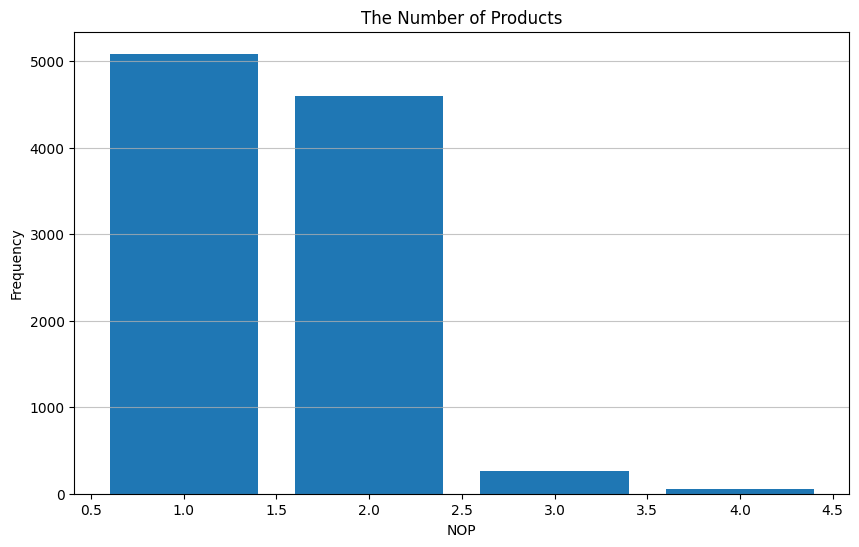

In [66]:
No_Products = df['NumOfProducts'].value_counts()

# Plotting the bar chart
plt.figure(figsize=(10, 6))
plt.bar(No_Products.index, No_Products.values)
plt.title('The Number of Products')
plt.xlabel('NOP')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.show()

In [67]:
df["HasCrCard"].value_counts()

,count
HasCrCard,
1,7055
0,2945


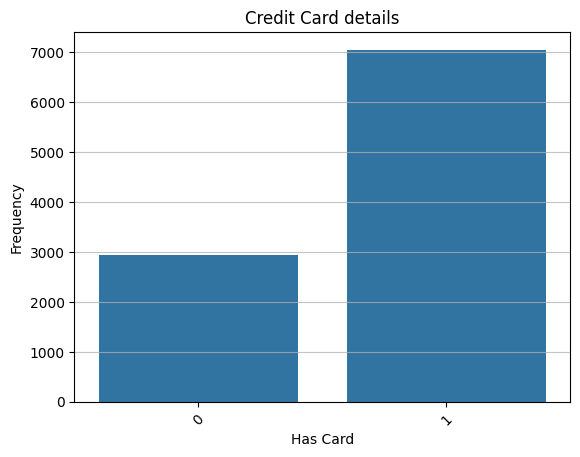

In [68]:
crcard = df['HasCrCard']

sns.countplot(x='HasCrCard', data=df)
plt.title("Credit Card details")
plt.xlabel("Has Card")
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.75)
plt.show()

In [69]:
df["IsActiveMember"].value_counts()

,count
IsActiveMember,
1,5151
0,4849


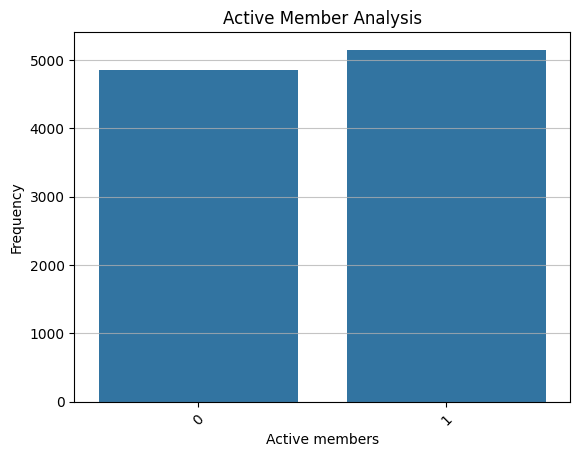

In [70]:
Active = df['IsActiveMember']

sns.countplot(x='IsActiveMember', data=df)
plt.title("Active Member Analysis")
plt.xlabel("Active members")
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.75)
plt.show()

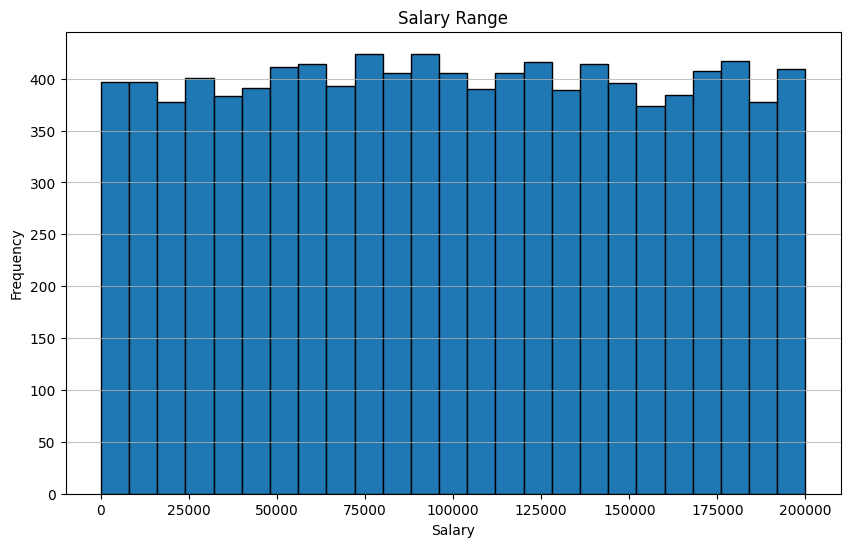

In [71]:
Age_range = df['EstimatedSalary']
plt.figure(figsize=(10, 6))
plt.hist(Age_range, bins=25,edgecolor='black')
plt.title('Salary Range')
plt.xlabel('Salary')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.show()

In [72]:
df["Exited"].value_counts()

,count
Exited,
0,7963
1,2037


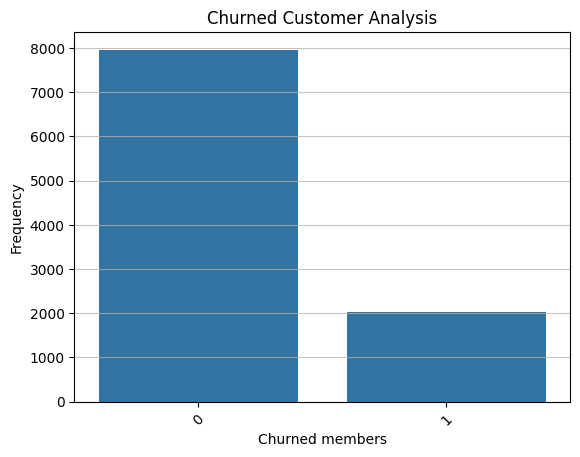

In [73]:
Active = df['Exited']

sns.countplot(x='Exited', data=df)
plt.title("Churned Customer Analysis")
plt.xlabel("Churned members")
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.75)
plt.show()

<ipython-input-74-afbb2bd44880>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Gender', y='EstimatedSalary', data=df, palette='Set3')


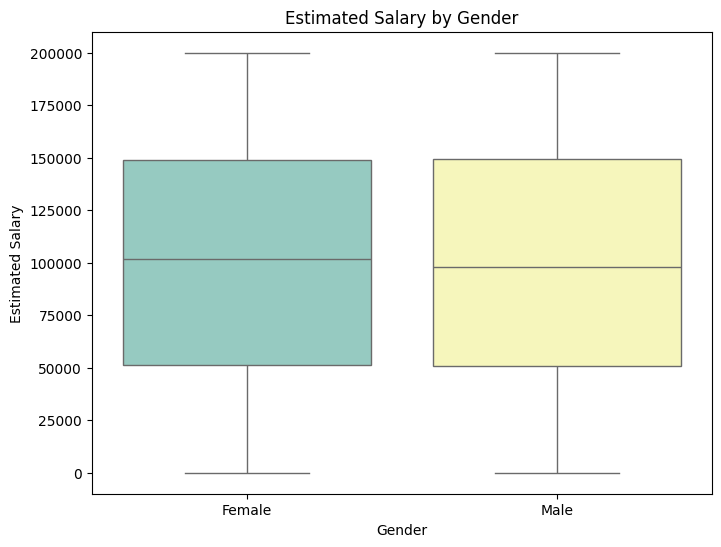

In [74]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Gender', y='EstimatedSalary', data=df, palette='Set3')
plt.title('Estimated Salary by Gender')
plt.xlabel('Gender')
plt.ylabel('Estimated Salary')
plt.show()

<ipython-input-75-6dc18086d518>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Gender', y='EstimatedSalary', data=df, palette='Set2', estimator=sum)


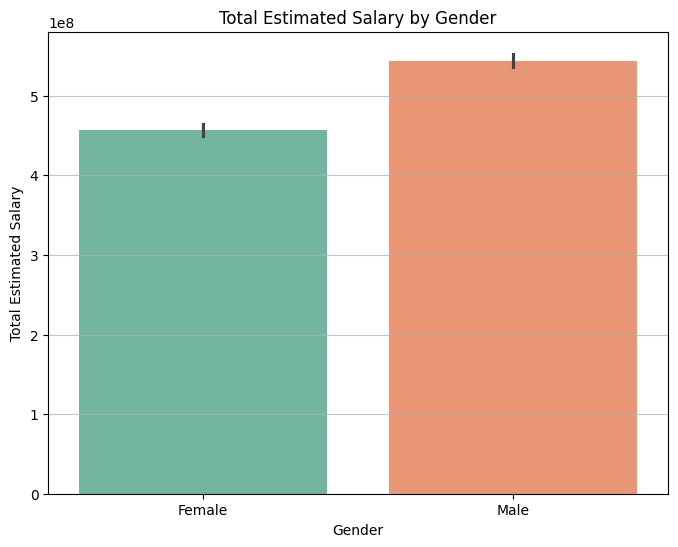

In [75]:
plt.figure(figsize=(8, 6))
sns.barplot(x='Gender', y='EstimatedSalary', data=df, palette='Set2', estimator=sum)
plt.title('Total Estimated Salary by Gender')
plt.xlabel('Gender')
plt.ylabel('Total Estimated Salary')
plt.grid(axis='y', alpha=0.75)
plt.show()

In [76]:
label_encoder = LabelEncoder()
df['Gender'] = label_encoder.fit_transform(df['Gender'])

df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Z_Score
0,1,15634602,Hargrave,619,France,0,42,2,0.00,1,1,1,101348.88,1,-1.225786
1,2,15647311,Hill,608,Spain,0,41,1,83807.86,1,0,1,112542.58,0,0.117344
2,3,15619304,Onio,502,France,0,42,8,159660.80,3,1,0,113931.57,1,1.332987
3,4,15701354,Boni,699,France,0,39,1,0.00,2,0,0,93826.63,0,-1.225786
4,5,15737888,Mitchell,850,Spain,0,43,2,125510.82,1,1,1,79084.10,0,0.785689
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,1,39,5,0.00,2,1,0,96270.64,0,-1.225786
9996,9997,15569892,Johnstone,516,France,1,35,10,57369.61,1,1,1,101699.77,0,-0.306363
9997,9998,15584532,Liu,709,France,0,36,7,0.00,1,0,1,42085.58,1,-1.225786
9998,9999,15682355,Sabbatini,772,Germany,1,42,3,75075.31,2,1,0,92888.52,1,-0.022606


In [77]:
df = pd.get_dummies(df, columns=['Geography'])

df

,RowNumber,CustomerId,Surname,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Z_Score,Geography_France,Geography_Germany,Geography_Spain
0,1,15634602,Hargrave,619,0,42,2,0.00,1,1,1,101348.88,1,-1.225786,True,False,False
1,2,15647311,Hill,608,0,41,1,83807.86,1,0,1,112542.58,0,0.117344,False,False,True
2,3,15619304,Onio,502,0,42,8,159660.80,3,1,0,113931.57,1,1.332987,True,False,False
3,4,15701354,Boni,699,0,39,1,0.00,2,0,0,93826.63,0,-1.225786,True,False,False
4,5,15737888,Mitchell,850,0,43,2,125510.82,1,1,1,79084.10,0,0.785689,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,1,39,5,0.00,2,1,0,96270.64,0,-1.225786,True,False,False
9996,9997,15569892,Johnstone,516,1,35,10,57369.61,1,1,1,101699.77,0,-0.306363,True,False,False
9997,9998,15584532,Liu,709,0,36,7,0.00,1,0,1,42085.58,1,-1.225786,True,False,False
9998,9999,15682355,Sabbatini,772,1,42,3,75075.31,2,1,0,92888.52,1,-0.022606,False,True,False


In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   RowNumber          10000 non-null  int64  
 1   CustomerId         10000 non-null  int64  
 2   Surname            10000 non-null  object 
 3   CreditScore        10000 non-null  int64  
 4   Gender             10000 non-null  int64  
 5   Age                10000 non-null  int64  
 6   Tenure             10000 non-null  int64  
 7   Balance            10000 non-null  float64
 8   NumOfProducts      10000 non-null  int64  
 9   HasCrCard          10000 non-null  int64  
 10  IsActiveMember     10000 non-null  int64  
 11  EstimatedSalary    10000 non-null  float64
 12  Exited             10000 non-null  int64  
 13  Z_Score            10000 non-null  float64
 14  Geography_France   10000 non-null  bool   
 15  Geography_Germany  10000 non-null  bool   
 16  Geography_Spain    1000

In [79]:
df = df.drop('Surname', axis=1)
df

,RowNumber,CustomerId,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Z_Score,Geography_France,Geography_Germany,Geography_Spain
0,1,15634602,619,0,42,2,0.00,1,1,1,101348.88,1,-1.225786,True,False,False
1,2,15647311,608,0,41,1,83807.86,1,0,1,112542.58,0,0.117344,False,False,True
2,3,15619304,502,0,42,8,159660.80,3,1,0,113931.57,1,1.332987,True,False,False
3,4,15701354,699,0,39,1,0.00,2,0,0,93826.63,0,-1.225786,True,False,False
4,5,15737888,850,0,43,2,125510.82,1,1,1,79084.10,0,0.785689,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,771,1,39,5,0.00,2,1,0,96270.64,0,-1.225786,True,False,False
9996,9997,15569892,516,1,35,10,57369.61,1,1,1,101699.77,0,-0.306363,True,False,False
9997,9998,15584532,709,0,36,7,0.00,1,0,1,42085.58,1,-1.225786,True,False,False
9998,9999,15682355,772,1,42,3,75075.31,2,1,0,92888.52,1,-0.022606,False,True,False


In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   RowNumber          10000 non-null  int64  
 1   CustomerId         10000 non-null  int64  
 2   CreditScore        10000 non-null  int64  
 3   Gender             10000 non-null  int64  
 4   Age                10000 non-null  int64  
 5   Tenure             10000 non-null  int64  
 6   Balance            10000 non-null  float64
 7   NumOfProducts      10000 non-null  int64  
 8   HasCrCard          10000 non-null  int64  
 9   IsActiveMember     10000 non-null  int64  
 10  EstimatedSalary    10000 non-null  float64
 11  Exited             10000 non-null  int64  
 12  Z_Score            10000 non-null  float64
 13  Geography_France   10000 non-null  bool   
 14  Geography_Germany  10000 non-null  bool   
 15  Geography_Spain    10000 non-null  bool   
dtypes: bool(3), float64(3),

FEATURE ENGENEERING

In [81]:
df = df.drop('RowNumber', axis=1)
df = df.drop('CustomerId', axis=1)

In [82]:
df['Balance_to_Salary_Ratio'] = df['Balance'] / df['EstimatedSalary']
df

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Z_Score,Geography_France,Geography_Germany,Geography_Spain,Balance_to_Salary_Ratio
0,619,0,42,2,0.00,1,1,1,101348.88,1,-1.225786,True,False,False,0.000000
1,608,0,41,1,83807.86,1,0,1,112542.58,0,0.117344,False,False,True,0.744677
2,502,0,42,8,159660.80,3,1,0,113931.57,1,1.332987,True,False,False,1.401375
3,699,0,39,1,0.00,2,0,0,93826.63,0,-1.225786,True,False,False,0.000000
4,850,0,43,2,125510.82,1,1,1,79084.10,0,0.785689,False,False,True,1.587055
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,1,39,5,0.00,2,1,0,96270.64,0,-1.225786,True,False,False,0.000000
9996,516,1,35,10,57369.61,1,1,1,101699.77,0,-0.306363,True,False,False,0.564108
9997,709,0,36,7,0.00,1,0,1,42085.58,1,-1.225786,True,False,False,0.000000
9998,772,1,42,3,75075.31,2,1,0,92888.52,1,-0.022606,False,True,False,0.808230


In [83]:
df['Age_Tenure_Ratio'] = df['Tenure'] / df['Age']
df['CreditScore_Age'] = df['CreditScore'] * df['Age']
df

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Z_Score,Geography_France,Geography_Germany,Geography_Spain,Balance_to_Salary_Ratio,Age_Tenure_Ratio,CreditScore_Age
0,619,0,42,2,0.00,1,1,1,101348.88,1,-1.225786,True,False,False,0.000000,0.047619,25998
1,608,0,41,1,83807.86,1,0,1,112542.58,0,0.117344,False,False,True,0.744677,0.024390,24928
2,502,0,42,8,159660.80,3,1,0,113931.57,1,1.332987,True,False,False,1.401375,0.190476,21084
3,699,0,39,1,0.00,2,0,0,93826.63,0,-1.225786,True,False,False,0.000000,0.025641,27261
4,850,0,43,2,125510.82,1,1,1,79084.10,0,0.785689,False,False,True,1.587055,0.046512,36550
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,1,39,5,0.00,2,1,0,96270.64,0,-1.225786,True,False,False,0.000000,0.128205,30069
9996,516,1,35,10,57369.61,1,1,1,101699.77,0,-0.306363,True,False,False,0.564108,0.285714,18060
9997,709,0,36,7,0.00,1,0,1,42085.58,1,-1.225786,True,False,False,0.000000,0.194444,25524
9998,772,1,42,3,75075.31,2,1,0,92888.52,1,-0.022606,False,True,False,0.808230,0.071429,32424


FEATURE SCALING

In [84]:
scaler = StandardScaler()
scaled_features = ['CreditScore', 'Age', 'Balance', 'NumOfProducts', 'EstimatedSalary', 'Z_Score', 'Balance_to_Salary_Ratio', 'Age_Tenure_Ratio', 'CreditScore_Age']
df[scaled_features] = scaler.fit_transform(df[scaled_features])
df

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Z_Score,Geography_France,Geography_Germany,Geography_Spain,Balance_to_Salary_Ratio,Age_Tenure_Ratio,CreditScore_Age
0,-0.326221,0,0.293517,2,-1.225848,-0.911583,1,1,0.021886,1,-1.225848,True,False,False,-0.035804,-1.009118,0.086709
1,-0.440036,0,0.198164,1,0.117350,-0.911583,0,1,0.216534,0,0.117350,False,False,True,-0.028930,-1.268654,-0.049277
2,-1.536794,0,0.293517,8,1.333053,2.527057,1,0,0.240687,1,1.333053,True,False,False,-0.022868,0.587029,-0.537811
3,0.501521,0,0.007457,1,-1.225848,0.807737,0,0,-0.108918,0,-1.225848,True,False,False,-0.035804,-1.254679,0.247224
4,2.063884,0,0.388871,2,0.785728,-0.911583,1,1,-0.365276,0,0.785728,False,False,True,-0.021154,-1.021491,1.427762
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1.246488,1,0.007457,5,-1.225848,0.807737,1,0,-0.066419,0,-1.225848,True,False,False,-0.035804,-0.108727,0.604092
9996,-1.391939,1,-0.373958,10,-0.306379,-0.911583,1,1,0.027988,0,-0.306379,True,False,False,-0.030597,1.651128,-0.922131
9997,0.604988,0,-0.278604,7,-1.225848,-0.911583,0,1,-1.008643,1,-1.225848,True,False,False,-0.035804,0.631367,0.026469
9998,1.256835,1,0.293517,3,-0.022608,0.807737,1,0,-0.125231,1,-0.022608,False,True,False,-0.028343,-0.743094,0.903389


FEATURE SELECTION

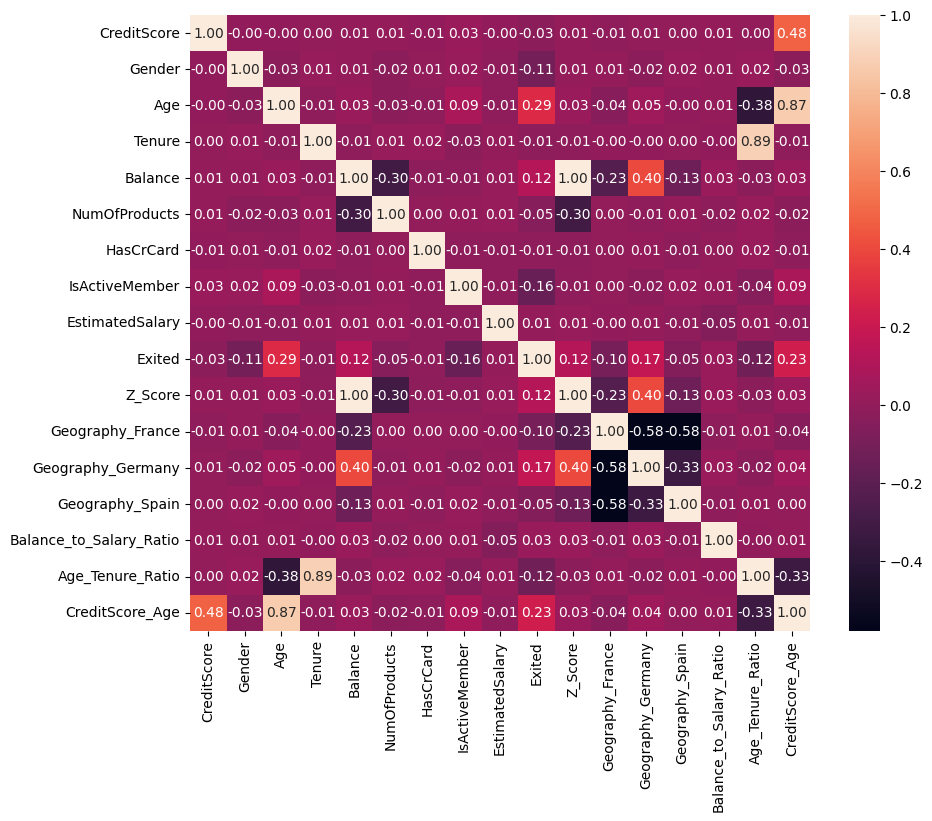

In [85]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, fmt=".2f")
plt.show()

In [86]:
df = df.drop('Balance', axis=1)
df

,CreditScore,Gender,Age,Tenure,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Z_Score,Geography_France,Geography_Germany,Geography_Spain,Balance_to_Salary_Ratio,Age_Tenure_Ratio,CreditScore_Age
0,-0.326221,0,0.293517,2,-0.911583,1,1,0.021886,1,-1.225848,True,False,False,-0.035804,-1.009118,0.086709
1,-0.440036,0,0.198164,1,-0.911583,0,1,0.216534,0,0.117350,False,False,True,-0.028930,-1.268654,-0.049277
2,-1.536794,0,0.293517,8,2.527057,1,0,0.240687,1,1.333053,True,False,False,-0.022868,0.587029,-0.537811
3,0.501521,0,0.007457,1,0.807737,0,0,-0.108918,0,-1.225848,True,False,False,-0.035804,-1.254679,0.247224
4,2.063884,0,0.388871,2,-0.911583,1,1,-0.365276,0,0.785728,False,False,True,-0.021154,-1.021491,1.427762
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1.246488,1,0.007457,5,0.807737,1,0,-0.066419,0,-1.225848,True,False,False,-0.035804,-0.108727,0.604092
9996,-1.391939,1,-0.373958,10,-0.911583,1,1,0.027988,0,-0.306379,True,False,False,-0.030597,1.651128,-0.922131
9997,0.604988,0,-0.278604,7,-0.911583,0,1,-1.008643,1,-1.225848,True,False,False,-0.035804,0.631367,0.026469
9998,1.256835,1,0.293517,3,0.807737,1,0,-0.125231,1,-0.022608,False,True,False,-0.028343,-0.743094,0.903389


In [87]:
df = df.drop('Balance_to_Salary_Ratio', axis=1)
df

,CreditScore,Gender,Age,Tenure,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Z_Score,Geography_France,Geography_Germany,Geography_Spain,Age_Tenure_Ratio,CreditScore_Age
0,-0.326221,0,0.293517,2,-0.911583,1,1,0.021886,1,-1.225848,True,False,False,-1.009118,0.086709
1,-0.440036,0,0.198164,1,-0.911583,0,1,0.216534,0,0.117350,False,False,True,-1.268654,-0.049277
2,-1.536794,0,0.293517,8,2.527057,1,0,0.240687,1,1.333053,True,False,False,0.587029,-0.537811
3,0.501521,0,0.007457,1,0.807737,0,0,-0.108918,0,-1.225848,True,False,False,-1.254679,0.247224
4,2.063884,0,0.388871,2,-0.911583,1,1,-0.365276,0,0.785728,False,False,True,-1.021491,1.427762
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1.246488,1,0.007457,5,0.807737,1,0,-0.066419,0,-1.225848,True,False,False,-0.108727,0.604092
9996,-1.391939,1,-0.373958,10,-0.911583,1,1,0.027988,0,-0.306379,True,False,False,1.651128,-0.922131
9997,0.604988,0,-0.278604,7,-0.911583,0,1,-1.008643,1,-1.225848,True,False,False,0.631367,0.026469
9998,1.256835,1,0.293517,3,0.807737,1,0,-0.125231,1,-0.022608,False,True,False,-0.743094,0.903389


In [88]:
X = df.drop(columns='Exited')  # Features
y = df['Exited']  # Target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

In [89]:
log_reg = LogisticRegression(random_state=42)
rf = RandomForestClassifier(random_state=42)
xgb_model = xgb.XGBClassifier(random_state=42)
svm = SVC(random_state=42)

In [90]:
log_reg.fit(X_train, y_train)

LogisticRegression(random_state=42)

In [91]:
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [92]:
xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [93]:
svm.fit(X_train, y_train)

SVC(random_state=42)

In [94]:
models = {
    'Logistic Regression': log_reg,
    'Random Forest': rf,
    'XGBoost': xgb_model,
    'Support Vector Machine': svm
}

for model_name, model in models.items():
    # Make predictions
    y_pred = model.predict(X_test)

    # Print evaluation metrics
    print(f"\n{model_name}:")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print(f"\n{'='*30}\n")


Logistic Regression:
[[2317   72]
 [ 485  126]]
              precision    recall  f1-score   support

           0       0.83      0.97      0.89      2389
           1       0.64      0.21      0.31       611

    accuracy                           0.81      3000
   macro avg       0.73      0.59      0.60      3000
weighted avg       0.79      0.81      0.77      3000

Accuracy: 0.8143333333333334



Random Forest:
[[2307   82]
 [ 323  288]]
              precision    recall  f1-score   support

           0       0.88      0.97      0.92      2389
           1       0.78      0.47      0.59       611

    accuracy                           0.86      3000
   macro avg       0.83      0.72      0.75      3000
weighted avg       0.86      0.86      0.85      3000

Accuracy: 0.865



XGBoost:
[[2264  125]
 [ 309  302]]
              precision    recall  f1-score   support

           0       0.88      0.95      0.91      2389
           1       0.71      0.49      0.58       611

    

In [99]:
rf_best = RandomForestClassifier(
    max_depth=20,
    max_features='sqrt',
    min_samples_leaf=1,
    min_samples_split=5,
    n_estimators=100,
    random_state=42
)

# Train the model
rf_best.fit(X_train, y_train)

RandomForestClassifier(max_depth=20, min_samples_split=5, random_state=42)

In [100]:
y_pred_rf_best = rf_best.predict(X_test)

# Evaluate the model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf_best))

print("\nClassification Report:")
print(classification_report(y_test, y_pred_rf_best))

print("Accuracy:", accuracy_score(y_test, y_pred_rf_best))

Confusion Matrix:
[[2314   75]
 [ 325  286]]

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.97      0.92      2389
           1       0.79      0.47      0.59       611

    accuracy                           0.87      3000
   macro avg       0.83      0.72      0.75      3000
weighted avg       0.86      0.87      0.85      3000

Accuracy: 0.8666666666666667


In [101]:
cv_scores_rf_best = cross_val_score(rf_best, X_train, y_train, cv=5)
print("Random Forest Cross-Validation Accuracy:", cv_scores_rf_best.mean())

Random Forest Cross-Validation Accuracy: 0.859


In [102]:
importances = rf_best.feature_importances_
feature_names = X_train.columns
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)
print(importance_df)

              Feature  Importance
2                 Age    0.170213
4       NumOfProducts    0.133321
13    CreditScore_Age    0.132474
8             Z_Score    0.109778
0         CreditScore    0.101136
7     EstimatedSalary    0.099231
12   Age_Tenure_Ratio    0.085552
3              Tenure    0.048042
6      IsActiveMember    0.044448
10  Geography_Germany    0.028502
1              Gender    0.015710
5           HasCrCard    0.013158
9    Geography_France    0.010090
11    Geography_Spain    0.008343


In [103]:
import joblib
joblib.dump(rf_best, 'random_forest_model.pkl')

['random_forest_model.pkl']